In [203]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
# Read Data from csv file
#link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [205]:
# Explore the Dataset

print("Number of rows and columns: ", df.shape)
print("\n\nColumns data type: \n\n", df.dtypes)

Number of rows and columns:  (100000, 9)


Columns data type: 

 gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [206]:
#Counting the number of null values

null_values = df.isnull().sum()
print("Number of null values in every column: \n\n", null_values) 
#no null values

Number of null values in every column: 

 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [207]:
#Describe

print("Statistical Analysis: \n\n")
df.describe()

Statistical Analysis: 




,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [208]:
#Skewness and Kurtosis

print("\nSkewness: \n", df.skew())
print("\nkurtosis: \n", df.kurtosis())


Skewness: 
 age                   -0.051979
hypertension           3.231296
heart_disease          4.733872
bmi                    1.043836
HbA1c_level           -0.066854
blood_glucose_level    0.821655
diabetes               2.976217
dtype: float64

kurtosis: 
 age                    -1.003835
hypertension            8.441441
heart_disease          20.409952
bmi                     3.520772
HbA1c_level             0.215392
blood_glucose_level     1.737624
diabetes                6.858005
dtype: float64


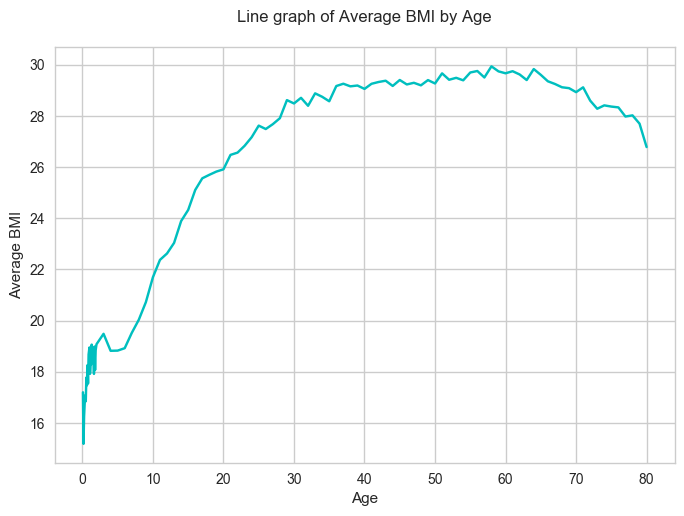

In [209]:
def plot_Line_graph(df):
    """
    Plots a line graph of average BMI by age.
    
    """
    x = df.groupby('age')['bmi'].mean()
    
    plt.figure(dpi=100)
    plt.plot(x.index, x.values, linestyle='-', color='c')
    plt.xlabel('Age')
    plt.ylabel('Average BMI')
    plt.title('Line graph of Average BMI by Age\n')
    
    plt.savefig('bmi_age_plot.png')
    
    plt.show()


    
plot_Line_graph(df)



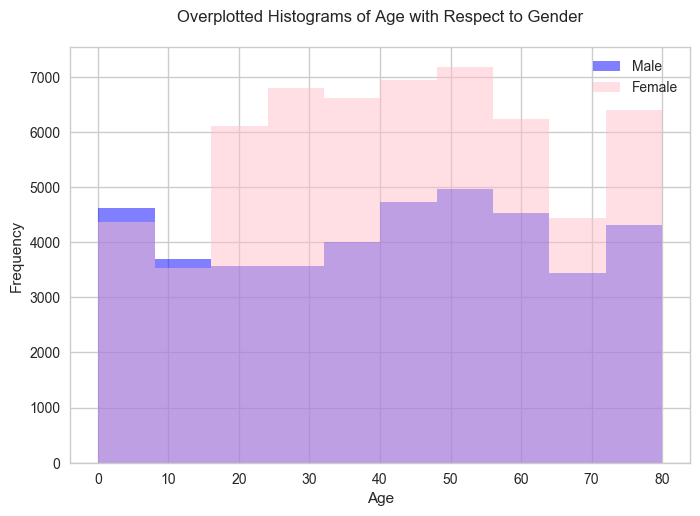

In [210]:
def plot_overplotted_histograms(*columns):
    """
    Plots two histograms on top of each other.
    """
    plt.figure(dpi=100)
    labels = ["Male", "Female"]
    colours = ['blue', 'pink']
    for i, column in enumerate(columns):
        plt.hist(column, label=labels[i], color=colours[i], bins=10, alpha=0.5)  # alpha = transparency (0-1)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Overplotted Histograms of Age with Respect to Gender\n')
    plt.legend()
    
    plt.savefig('hist_age_gender.png')
    
    plt.show()


plot_overplotted_histograms(df[df['gender'] == 'Male'].age, df[df['gender'] == 'Female'].age)


In [211]:
#making two seperate dataframes for diabetic and non diabetic  

df_diabetic = df[(df['diabetes'] == 1)]
df_nondiabetic = df[(df['diabetes'] == 0)]

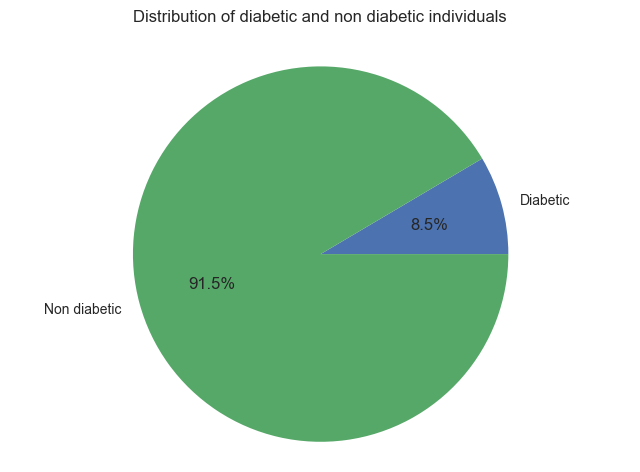

In [212]:
def plot_dataset_pie(column):
    """
    Creates a pie chart that shows the 
    distribution of diabetic and non diabetic individuals in dataset.
    """
    plt.figure(dpi=100)
    plt.pie(column, labels=["Diabetic", "Non diabetic"], autopct='%1.1f%%')
    plt.title('Distribution of diabetic and non diabetic individuals\n')
    plt.axis('equal')
    
    plt.savefig('pie_distribution.png')
    
    plt.show()


plot_dataset_pie([len(df_diabetic), len(df_nondiabetic)])


In [213]:
#number of diabetic and non diabetic individuals in our dataset

print("Diabetic: \n",df_diabetic.shape)
print("Non Diabetic: \n",df_nondiabetic.shape)

Diabetic: 
 (8500, 9)
Non Diabetic: 
 (91500, 9)


In [214]:
#Counting number of diabetic individuals with different diseases.

#number of diabetic individuals who are only suffring from heart disease 
heart_disease_count = df_diabetic[
    ((df_diabetic['heart_disease']) == 1) &
    ((df_diabetic['hypertension']) == 0)
].shape[0]

#number of diabetic individuals who are only suffring from hypertension
hypertension_count = df_diabetic[
    ((df_diabetic['heart_disease']) == 0) &
    ((df_diabetic['hypertension']) == 1)
].shape[0]

#number of diabetic individuals who are suffring from both heart disease and hypertension
both_count = df_diabetic[
    ((df_diabetic['heart_disease']) == 1) &
    ((df_diabetic['hypertension']) == 1)
].shape[0]


#number of diabetic individuals who are neither suffring from heart disease or hypertension
no_count = df_diabetic[
    ((df_diabetic['heart_disease']) == 0) &
    ((df_diabetic['hypertension']) == 0)
].shape[0]

#print(heart_disease_count)
#print(hypertension_count)
#print(both_count)
#print(no_count)

In [223]:
#Counting number of non-diabetic individuals with different diseases.

#number of non-diabetic individuals who are only suffring from heart disease
n_heart_disease_count = df_nondiabetic[
    ((df_nondiabetic['heart_disease']) == 1) &
    ((df_nondiabetic['hypertension']) == 0)
].shape[0]

#number of non-diabetic individuals who are only suffring from hypertension
n_hypertension_count = df_nondiabetic[
    ((df_nondiabetic['heart_disease']) == 0) &
    ((df_nondiabetic['hypertension']) == 1)
].shape[0]

#number of non-diabetic individuals who are suffring from both heart disease and hypertension
n_both_count = df_nondiabetic[
    ((df_nondiabetic['heart_disease']) == 1) &
    ((df_nondiabetic['hypertension']) == 1)
].shape[0]

#number of non-diabetic individuals who are neither suffring from heart disease or hypertension
n_no_count = df_nondiabetic[
    ((df_nondiabetic['heart_disease']) == 0) &
    ((df_nondiabetic['hypertension']) == 0)
].shape[0]

#print(n_heart_disease_count)
#print(n_hypertension_count)
#print(n_both_count)
#print(n_no_count)

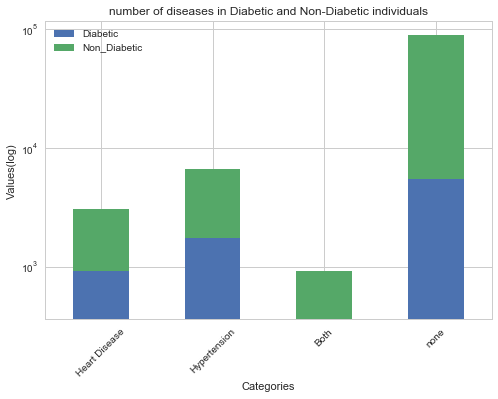

In [237]:
def plot_bar_chart(df_disease):
    """
    Plots a stack bar graph of diabetic and 
    non diabetic individuals with different diseases.  
    """

    df_disease.plot(kind='bar', x='Categories', y=['Diabetic', 'Non_Diabetic'], stacked=True)
    
    plt.xlabel('Categories')
    plt.ylabel('Values(log)')
    plt.xticks(rotation=45)
    plt.title('number of diseases in Diabetic and Non-Diabetic individuals')
    plt.yscale('log')
    
    plt.savefig('diseases_diabetic_nondiabetic.png')
    
    plt.show()



data_disease = {
    'Categories': ['Heart Disease', 'Hypertension', 'Both', 'none'],
    'Diabetic' : [heart_disease_count,hypertension_count,both_count,no_count],
    'Non_Diabetic' : [n_heart_disease_count,n_hypertension_count,n_both_count,n_no_count]
}


df_disease = pd.DataFrame(data_disease)
plot_bar_chart(df_disease)


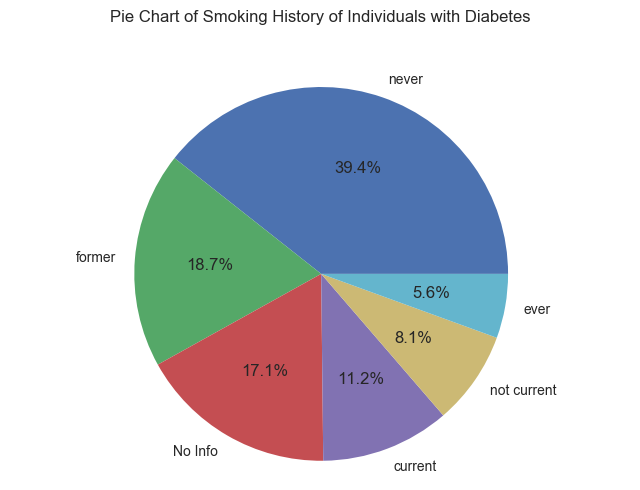

In [239]:
def pie_chart_smoking(column,labels):
    """
    Creates a pie chart of smoking history of diabetic patients 
    """
    plt.figure(dpi=100)
    plt.pie(column, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Pie Chart of Smoking History of Individuals with Diabetes\n\n')
    
    plt.savefig('pie_diabetic_smoking.png')
    
    plt.show()


s_count = df_diabetic['smoking_history'].value_counts()
labels=list(s_count.index)
pie_chart_smoking(s_count,labels)

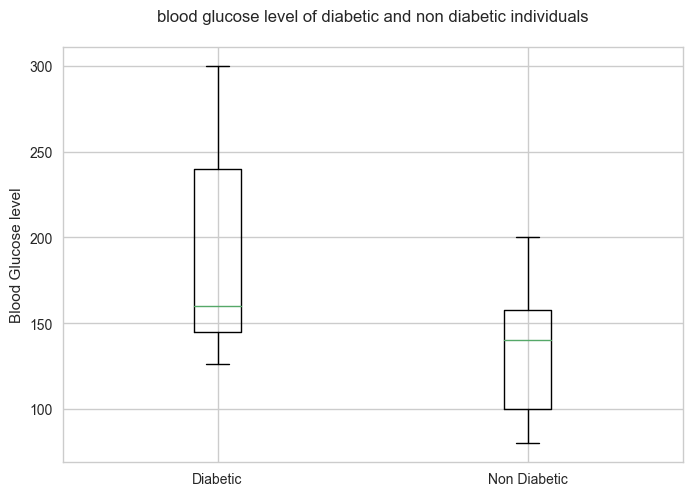

In [243]:
def plot_box(*columns):
    """
    Creates box plot of blood glucose level of diabetic and non diabetic individuals
    """
    
    plt.figure(dpi=100)
    
    labels=["Diabetic","Non Diabetic"]

    plt.boxplot(columns, labels=labels)

    plt.ylabel('Blood Glucose level')
    plt.title("blood glucose level of diabetic and non diabetic individuals\n")
    plt.savefig('blood_glucose_box_plot.png')
    
    plt.show()

plot_box(df_diabetic["blood_glucose_level"],df_nondiabetic["blood_glucose_level"])

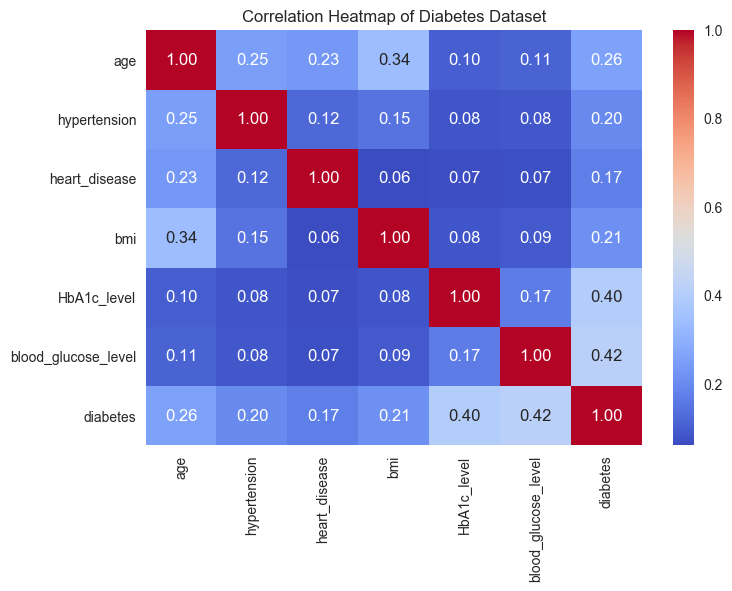

Correlation Matrix:                            age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_

In [241]:
def plot_heatmap(df):
    """
    Plots a heatmap of the correlation matrix of the Dataset.
    """
    corr_m = df.corr()

    plt.figure(dpi=100)
    
    sns.heatmap(corr_m, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Diabetes Dataset')
    
    plt.savefig('heatmap.png')
    
    plt.show()
    
    print("Correlation Matrix: ", corr_m)

    
plot_heatmap(df)